In [149]:
#package
import pyAgrum as gum

#declare netowrk, I am calling it ConvBN - converted Bayesian Network
ConvBN = gum.BayesNet('TestNetwork')

#declare variables
Examlevel = ConvBN.add(gum.LabelizedVariable('Examlevel', 'Variable1', 2))
IQlevel = ConvBN.add(gum.LabelizedVariable('IQlevel','Variable2',2))
Marks = ConvBN.add(gum.LabelizedVariable('Marks','Variable3',2))
Aptiscore = ConvBN.add(gum.LabelizedVariable('Aptitudescore','Variable4',2))
Admission = ConvBN.add(gum.LabelizedVariable('Admission','Variable5',2))
Examintervention = ConvBN.add(gum.LabelizedVariable('Examintervention','DecisionVar1',2))

#declare structure
ConvBN = gum.fastBN("Examlevel->Marks<-IQlevel->Aptitudescore;Marks->Admission")

#the first set of variables Exam level and IQ level
ConvBN.cpt('IQlevel')[:] = [0.8, 0.2]
ConvBN.cpt('Examlevel')[:] = [0.7, 0.36]
#ConvBN.cpt('Examintervention')[:] = [0.7, 0.36]

#the second level, marks, given IQ level and Exam level
ConvBN.cpt('Marks')[{'Examlevel':0, 'IQlevel':0}] = [0.6, 0.4]
ConvBN.cpt('Marks')[{'Examlevel':0, 'IQlevel':1}] = [0.9, 0.1]
ConvBN.cpt('Marks')[{'Examlevel':1, 'IQlevel':0}] = [0.5, 0.5]
ConvBN.cpt('Marks')[{'Examlevel':1, 'IQlevel':0}] = [0.8, 0.2]

#Admission given Marks
ConvBN.cpt('Admission')[{'Marks':0}] = [0.6, 0.4]
ConvBN.cpt('Admission')[{'Marks':1}] = [0.9, 0.1]

#Aptiscore given IQlevel
ConvBN.cpt('Aptitudescore')[{'IQlevel':0}] = [0.75, 0.25]
ConvBN.cpt('Aptitudescore')[{'IQlevel':1}] = [0.4, 0.6]

#a neat function of this library, generating a database given the network
dbg = gum.BNDatabaseGenerator(ConvBN)
k = dbg.drawSamples(10000)
dbg.toCSV('BNSample.csv')

[bnlearn] >Bayesian DAG created.
[bnlearn] >Plot based on BayesianModel


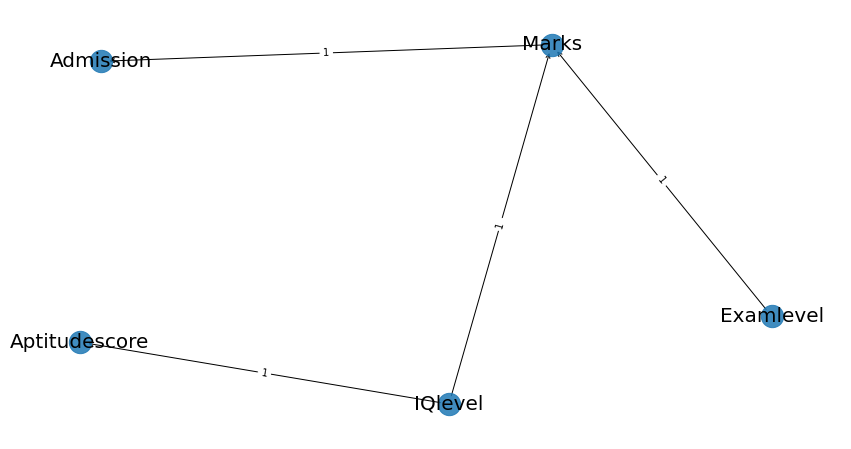

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


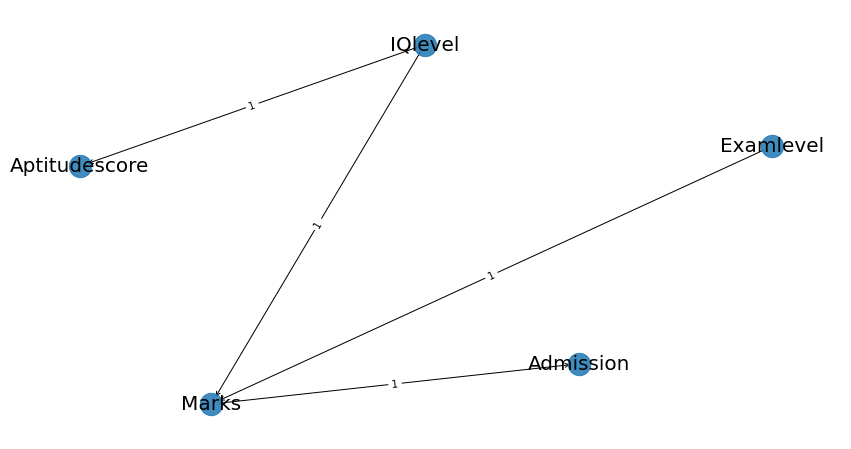

[bnlearn] >Plot based on BayesianModel


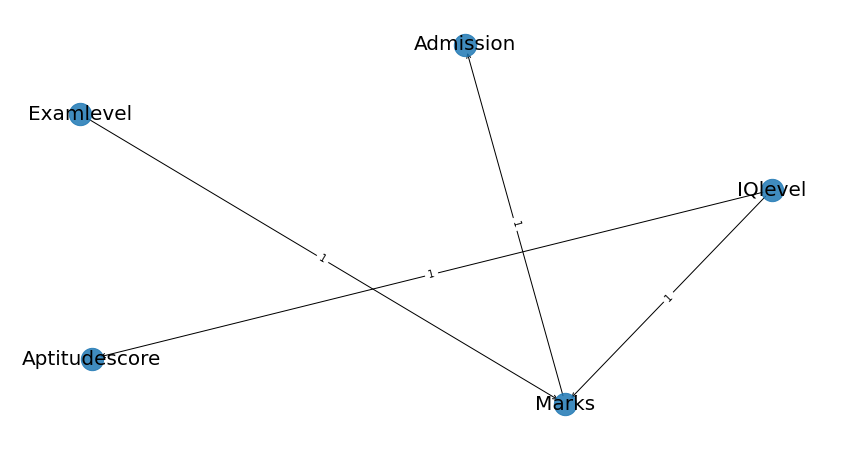

[bnlearn] >Existing coordinates from <pos> are used.


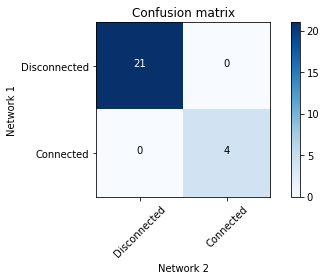

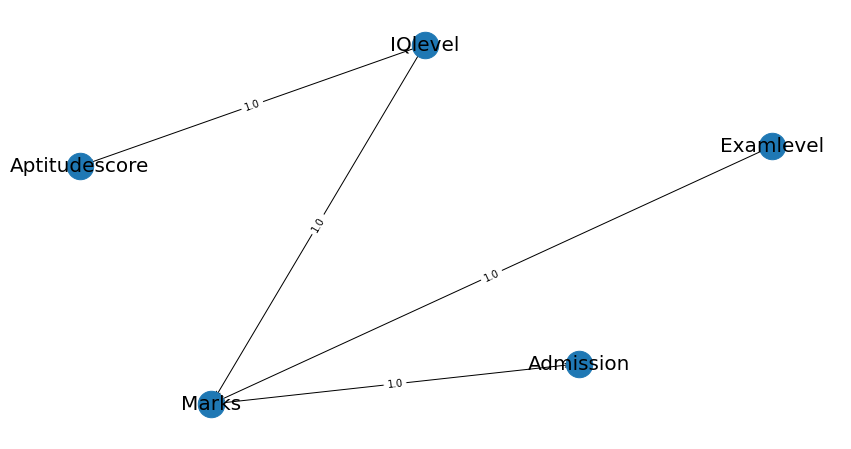

(array([[21,  0],
        [ 0,  4]], dtype=int64),
 target         Examlevel  Marks  IQlevel  Aptitudescore  Admission
 source                                                            
 Examlevel              0      1        0              0          0
 Marks                  0      0        0              0          1
 IQlevel                0      1        0              1          0
 Aptitudescore          0      0        0              0          0
 Admission              0      0        0              0          0)

In [1]:
import bnlearn as bn
import pandas as pd

#Create an empty but functional BN
Diagram = [('Examlevel', 'Marks'),
         ('IQlevel', 'Aptitudescore'),
         ('IQlevel', 'Marks'),
         ('Marks', 'Admission')]

# Make the actual Bayesian DAGexample
DAGexample = bn.make_DAG(Diagram)
d3 = bn.plot(DAGexample)

#Read the data that was created
df = pd.read_csv('filepath')
df.head()

#Compare the model learned from data to the normalised structure

model = bn.structure_learning.fit(df)

G = bn.plot(model)

G2 = bn.plot(DAGexample)


#construct Confusion Matrix between the various 
bn.compare_networks(DAGexample, model, pos=G['pos'])

In [150]:
import bnlearn as bn
import pandas as pd

In [151]:
df = pd.read_csv('C:\\Users\\Combrinkhm\\BNSample.csv')
df.head()

,Examlevel,Marks,IQlevel,Aptitudescore,Admission
0,0,0,1,0,1
1,1,1,0,0,0
2,0,0,0,0,1
3,0,0,1,1,0
4,0,0,0,0,1


[bnlearn] >Bayesian DAG created.
[bnlearn] >Plot based on BayesianModel


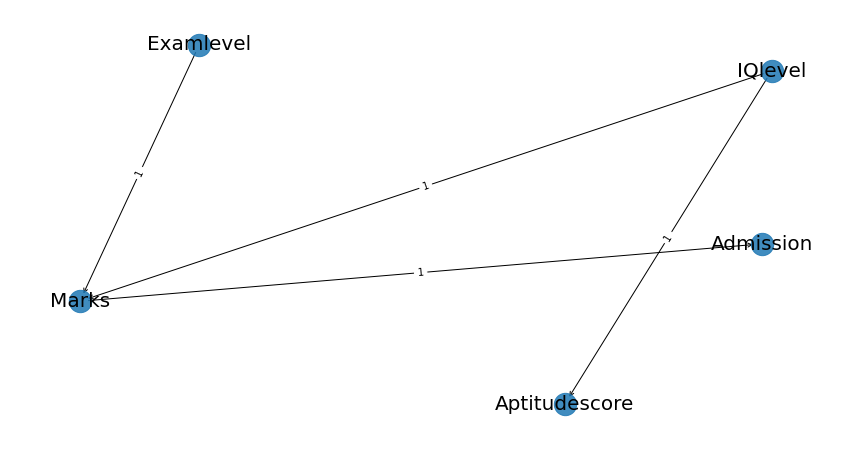

In [154]:
# Define the network structure
Diagram = [('Examlevel', 'Marks'),
         ('IQlevel', 'Aptitudescore'),
         ('IQlevel', 'Marks'),
         ('Marks', 'Admission')]

# Make the actual Bayesian DAG

df = pd.read_csv('filepath')
df.head()
DAGexample = bn.make_DAG(Diagram)
d3 = bn.plot(DAGexample)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


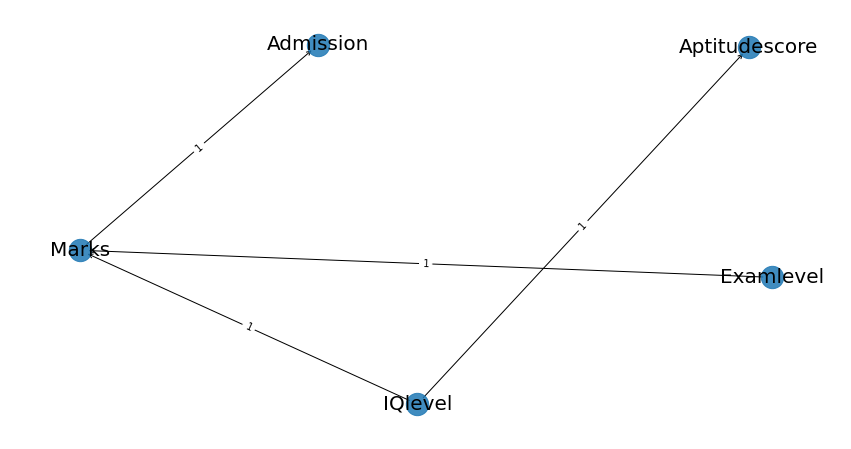

[bnlearn] >Plot based on BayesianModel


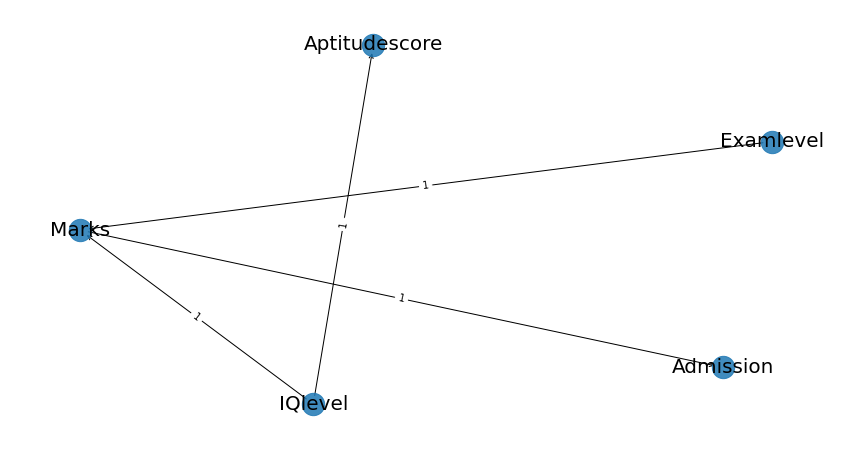

[bnlearn] >Existing coordinates from <pos> are used.


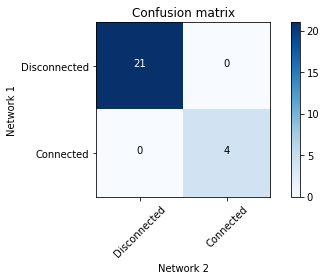

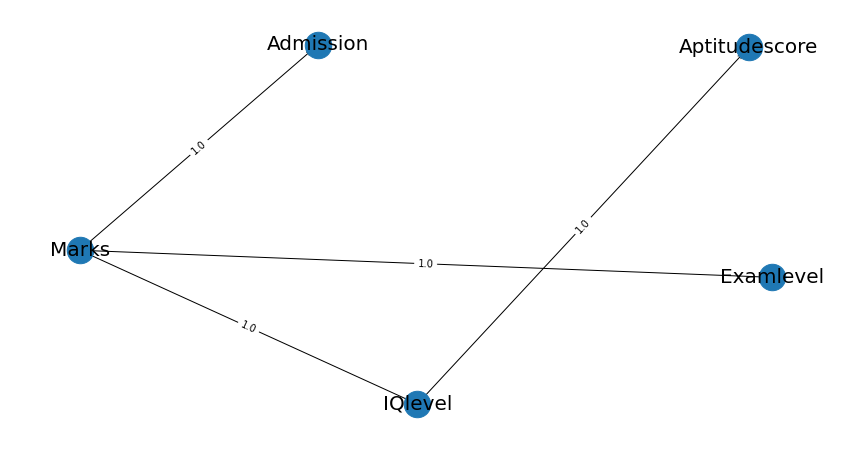

(array([[21,  0],
        [ 0,  4]], dtype=int64),
 target         Examlevel  Marks  IQlevel  Aptitudescore  Admission
 source                                                            
 Examlevel              0      1        0              0          0
 Marks                  0      0        0              0          1
 IQlevel                0      1        0              1          0
 Aptitudescore          0      0        0              0          0
 Admission              0      0        0              0          0)

In [155]:
model = bn.structure_learning.fit(df)
#model2 = bn.structure_learning.fit(dbg)
G = bn.plot(model)
G2 = bn.plot(DAGexample)
bn.compare_networks(DAGexample, model, pos=G['pos'])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


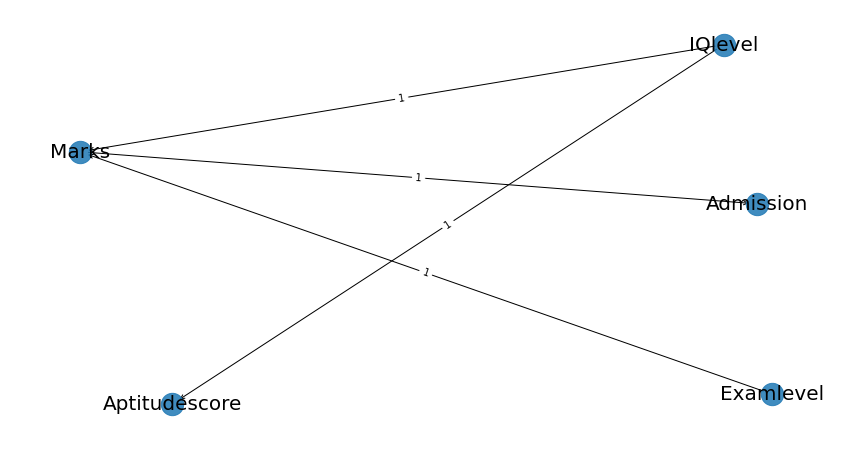

[bnlearn] >Plot based on BayesianModel
[bnlearn] >Existing coordinates from <pos> are used.


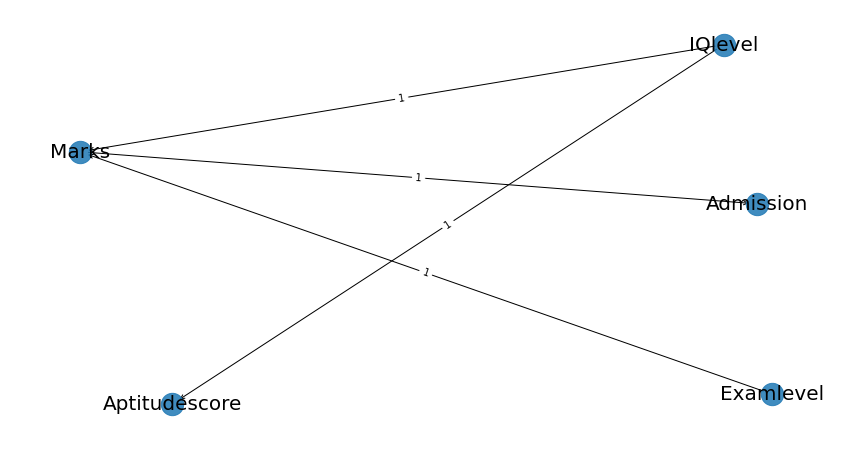

{'pos': {'Examlevel': array([ 0.64265238, -0.78437828]),
  'Marks': array([-1.        ,  0.44693127]),
  'IQlevel': array([0.52887059, 0.99115757]),
  'Aptitudescore': array([-0.78043224, -0.83564294]),
  'Admission': array([0.60890926, 0.18193238])},
 'G': <networkx.classes.digraph.DiGraph at 0x220bdd63eb0>}

In [ ]:
# Load asia DAG
#model = bn.import_DAG('asia')
# plot ground truth
G = bn.plot(model2)
# Sampling
#df2 = bn.sampling(model)
# Structure learning of sampled dataset
model_sl = bn.structure_learning.fit(df2, methodtype='hc', scoretype='bic')
# Plot based on structure learning of sampled data
bn.plot(model_sl, pos=G['pos'])

# Compare networks and make plot
bn.compare_networks(model, model_sl, pos=G['pos'])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


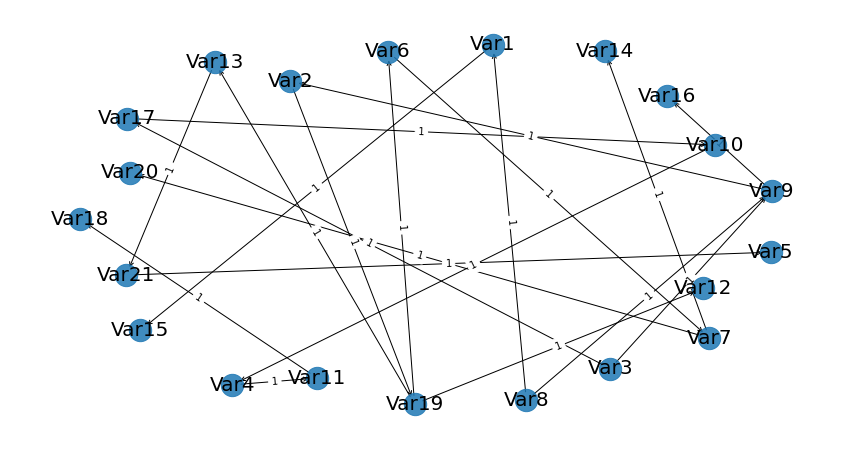

In [12]:
df = pd.read_csv('filepath')
df.head()

#Compare the model learned from data to the normalised structure

model = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')

G = bn.plot(model)

[bnlearn] >Plot based on BayesianModel
[bnlearn] >Existing coordinates from <pos> are used.


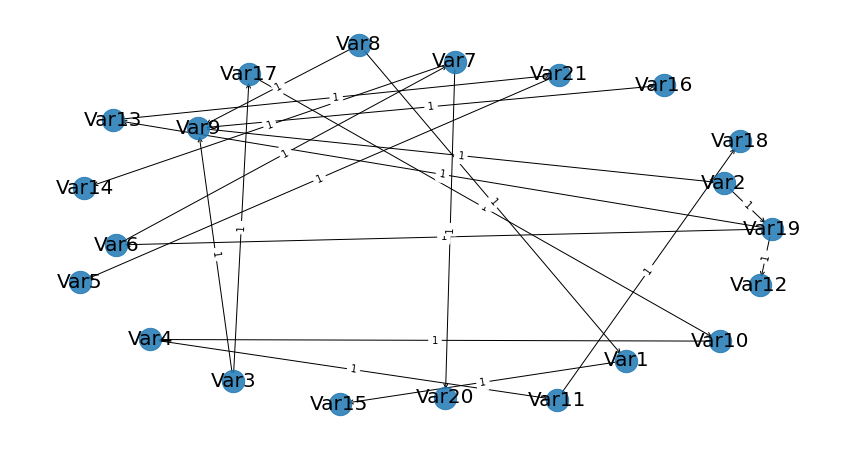

{'pos': {'Var1': array([ 0.56013424, -0.73265342]),
  'Var2': array([0.8316938 , 0.24084733]),
  'Var3': array([-0.53844024, -0.84534787]),
  'Var4': array([-0.77004983, -0.61736181]),
  'Var5': array([-0.96693612, -0.30281323]),
  'Var6': array([-0.8650958 , -0.09873816]),
  'Var7': array([0.08125676, 0.90751776]),
  'Var8': array([-0.18680329,  1.        ]),
  'Var9': array([-0.63616967,  0.54171774]),
  'Var10': array([ 0.82054548, -0.62637735]),
  'Var11': array([ 0.36561933, -0.94795733]),
  'Var12': array([ 0.93199477, -0.31945922]),
  'Var13': array([-0.87397938,  0.58705035]),
  'Var14': array([-0.95396593,  0.21213689]),
  'Var15': array([-0.2414628 , -0.97153157]),
  'Var16': array([0.66479482, 0.77759055]),
  'Var17': array([-0.49369732,  0.83745289]),
  'Var18': array([0.87792364, 0.46942311]),
  'Var19': array([ 0.96564331, -0.01096807]),
  'Var20': array([ 0.05437575, -0.93643719]),
  'Var21': array([0.37261848, 0.83590859])},
 'G': <networkx.classes.digraph.DiGraph at 0x

In [11]:
bn.plot(model, pos=G['pos'])